<img src="./images/Logo1.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="700 px" align="center">

# 第七章　量子テレポーテーション
<a id='a1'></a>

**本章の内容** 　　　　　　[全体目次](./Contents.ipynb)
- [第七章　量子テレポーテーション](#a1)
  - [量子テレポーテーションの概要](#a2)
  - [各ステップごとの状態変化を計算する](#a3)
  - [いくつかの疑問について](#a4)
- [量子テレポーテションをプログラムする](#a5)
  - [演習問題](#a6)


1960年代のベルの結果にも関わらず、多くの人にとって、エンタングルメントは「奇妙な状態」のままであり続けたように思う。
エンタングルメントの重要性の認識に大きな転機をもたらしたのは、1993年のベネットらによるエンタングルメントを利用した「量子テレポーテーション」の発見であった。ベルの結果から30年、アインシュタインの発見からは、60年近くたっていた。

量子テレポーテーションは、量子の状態を遠隔地にそのまま転送する技術である。それは、将来の量子通信の可能性を開くものである。2007年には、Entanglement swappingが発見され、量子テレポーテーションの具体的な通信技術としての実現の道が大きく開かれた。2017年には、中国の研究チームが地上と通信衛星間の量子テレポーテーションに成功したという論文を発表している。

量子論のIT技術への応用では、量子コンピュータに対する関心が高いのだが、量子テレポーテーションを基本的なプロトコルとする「量子通信」技術や「量子暗号」技術が、一足先に実用化される可能性は高い。

## 量子テレポーテーションの概要 <a id='a2'></a>
- AliceとBobは、あらかじめエンタングルした二つの量子を持っているとしよう。このエンタングル状態を、例えば、Bell Stateの$|\Phi^+\rangle$=1/√2 (|00>+ |11>)だとしよう。
- Aliceは、このエンタングルした量子と、Bobに転送したい $|\psi\rangle$という状態の1 qubitの量子の二つを持っている。
- Aliceは、転送したい量子$|\psi\rangle$とエンタングルした量子の二つを観測する。この結果、それぞれ、$M_1, M_2$という古典1 bitの情報を得る。
- Bobは、Aliceから$M_1, M_2$という計2bitの情報を受け取り、その情報に基づいて、Aliceの観測により状態変化したエンタングルメントしていた qubitを修正する。
- 修正するゲートの組み合わせをうまく選べば、元の情報$|\psi\rangle$を復元できる。

<img src="./images/teleportation/teleportation.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

## 各ステップごとの状態変化を計算する <a id='a3'></a>
時間の変化とともに、それぞれのステップで、状態変化がどのように起きるかを計算してみよう。

### ステップ  $|\psi_0\rangle$
このステップでの状態$|\psi_0\rangle$は、回路に入る直前の状態であるから、$|\psi\rangle \otimes |\Phi^+\rangle$という状態である。

<img src="./images/teleportation/t0.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

### ステップ  $|\psi_1\rangle$
このステップでの状態$|\psi_1\rangle$は、先の$|\psi_0\rangle$の第一、第二qubitに CNOTを適用すればいい。
第一qubitの$|1\rangle$ 成分のところだけ、第二qubitを反転させればいい。図の式の赤い字の部分だが、$\beta|1\rangle$が第一qubitなのは明らかだが、このCNOTが作用するターゲットbitは、$|\Phi^+\rangle$の先頭bitになる。
<img src="./images/teleportation/t1.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

### ステップ  $|\psi_2\rangle$
このステップでの状態$|\psi_2\rangle$は、先の$|\psi_1\rangle$の第一qubitに をHadamard を適用すればいい。Hadamardの作用で、$|0\rangle は|0\rangle+|1\rangle に、|1\rangle は|0\rangle-|1\rangle$に変化する。（図の赤字の部分。）

ここでは、それをいったん3 qubitのテンソル積に展開し、その後、あらためて $|00\rangle, |01\rangle, |10\rangle, |11\rangle$ をくくり出している。くくりだされた 2 qubitは、Aliceが観測する 2 qubitである。

これ以外の第三qubitの項は、Bobが持っていた エンタングルしたもう一方の量子の状態を表している。

<img src="./images/teleportation/t2.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

### ステップ  $|\psi_3\rangle$
このステップでの状態$|\psi_3\rangle$は、先の状態$|\psi_2\rangle$が、Aliceの観測$M_1,M_2$によって変化したBob側の状態を表している。

状態$|\psi_2\rangle$を見れば、Aliceが第一、第二bitを観測して、
- その結果が(0,0)であれば、Bobの第三qubitの状態は、$\alpha|0\rangle+\beta|1\rangle$
- その結果が(0,1)であれば、Bobの第三qubitの状態は、$\alpha|1\rangle+\beta|0\rangle$
- その結果が(1,0)であれば、Bobの第三qubitの状態は、$\alpha|0\rangle-\beta|1\rangle$
- その結果が(1,1)であれば、Bobの第三qubitの状態は、$\alpha|1\rangle-\beta|0\rangle$

となることがわかる。

<img src="./images/teleportation/t3.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

### ステップ  $|\psi_4\rangle$
このステップでは、Aliceの観測$M_1, M_2$の値に応じて、四つの状態をとる$|\psi_3\rangle$を、元の状態$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$に復元するために、必要なゲートを適用して。その結果を$|\psi_4\rangle$とする。

- $(M_1,M_2)=(0,0)$の時、$|\psi_3(00)\rangle$のままで、何もしない
- $(M_1,M_2)=(0,1)$の時、$|\psi_3(01)\rangle$に、Xを適用する
- $(M_1,M_2)=(1,0)$の時、$|\psi_3(10)\rangle$に、Zを適用する
- $(M_1,M_2)=(1,1)$の時、$|\psi_3(11)\rangle$に、ZXを適用する


この時、図に示したような計算で、$|\psi_4\rangle$に、元の$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$が復活することがわかる。
<img src="./images/teleportation/t4.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

## いくつかの疑問について <a id='a4'></a>
### 第一。量子テレポーテーションは、光より早く量子状態を送ることができるのだろうか？
### <span style="color: blue; " />これに対する答えは、明確にノーだ。テレポーテーションを実行するためには、Aliceは観測結果を、古典的な通信路で、Bobに送らなければならないのだから。
### 第二。量子テレポーテーションは、未知の量子状態のコピーを禁じたNo Cloning定理を破ることにならないか？ 
### <span style="color: blue; " />これについても、答えはノーだ。Bobのもとで、量子状態は再現されるのだが、Aliceのもとにあったオリジナルの量子状態は、Aliceの観測によって、|0>か|１>かの状態に変わって、失われている。



# 量子テレポーテションをプログラムする <a id='a5'></a>

ここでは、先に見た量子テレポーテーションのアルゴリズムをゲートを構成してプログラムしてみよう。

量子テレポーテーションは、任意の1 qubitを転送できるのだが、量子コンピュータでは、任意の入力を与えることは、一般には容易ではない。このプログラムの実行では、先にも利用した$R_y(y=\pi/4)$を、転送すべき状態として選んでいる。

**コードのインポート**

In [1]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, IBMQ, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [2]:
# Creating registers
tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

# エンタングル状態を準備するための、Bell Stateゲートを組み込む 
teleport = QuantumCircuit(tq, tc0,tc1,tc2)
teleport.h(tq[1])
teleport.cx(tq[1], tq[2])

In [3]:
# 転送すべき量子状態を、Ry(y=π/4)で用意する
teleport.ry(np.pi/4,tq[0])

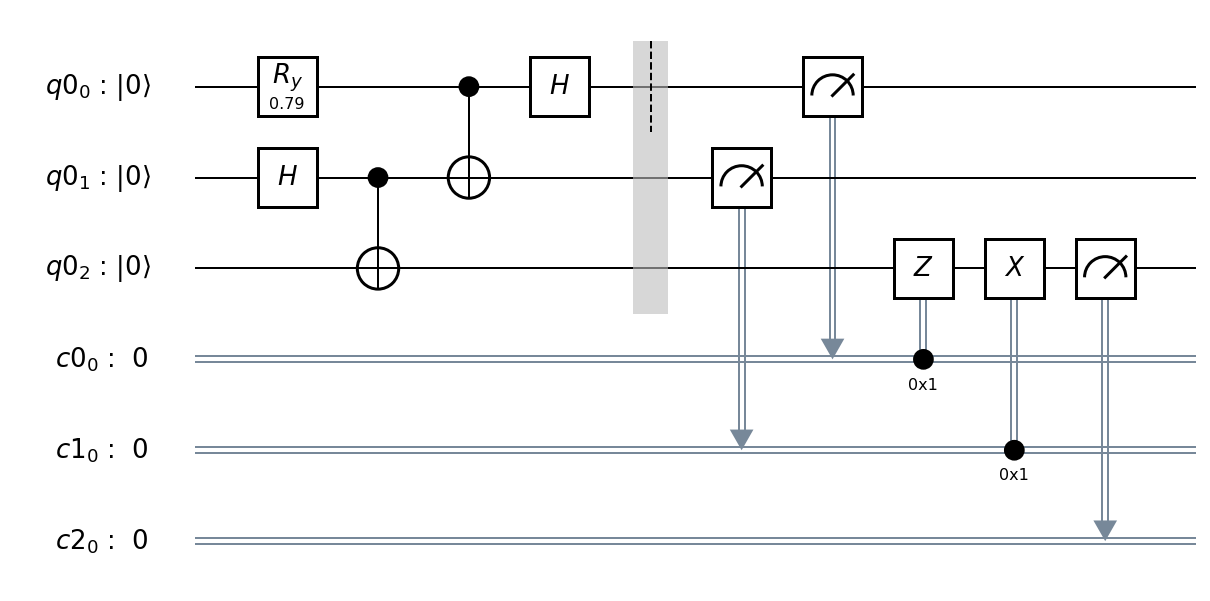

In [4]:
teleport.cx(tq[0], tq[1])
teleport.h(tq[0])
teleport.barrier()

# Aliceが行う第一qubit, 第二qubitの観測の結果を、古典ビットのレジスターtc0,tc1に入れる
teleport.measure(tq[0], tc0[0])
teleport.measure(tq[1], tc1[0])

# 観測で得られた古典bit tc0, tc1の値で、ゲートZ,Xをコントロールしている
teleport.z(tq[2]).c_if(tc0, 1)
teleport.x(tq[2]).c_if(tc1, 1)

teleport.measure(tq[2], tc2[0])

# この回路が、先に見た回路と等しいことを確かめよ
teleport.draw(output='mpl')

In [5]:
local_backend = BasicAer.get_backend('qasm_simulator') # note that this circuit can not be run on an IBM Q device
teleport_job = execute(teleport, local_backend) 
teleport_result = teleport_job.result()

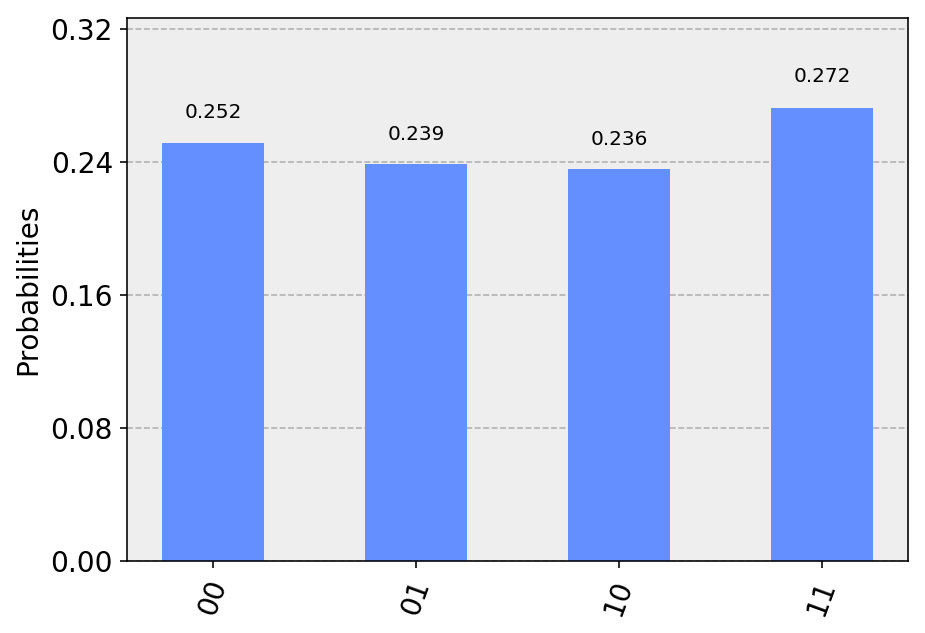

In [6]:
data = teleport_result.get_counts(teleport)
alice = {}
alice['00'] = data['0 0 0'] + data['1 0 0']
alice['10'] = data['0 1 0'] + data['1 1 0']
alice['01'] = data['0 0 1'] + data['1 0 1']
alice['11'] = data['0 1 1'] + data['1 1 1']
plot_histogram(alice)

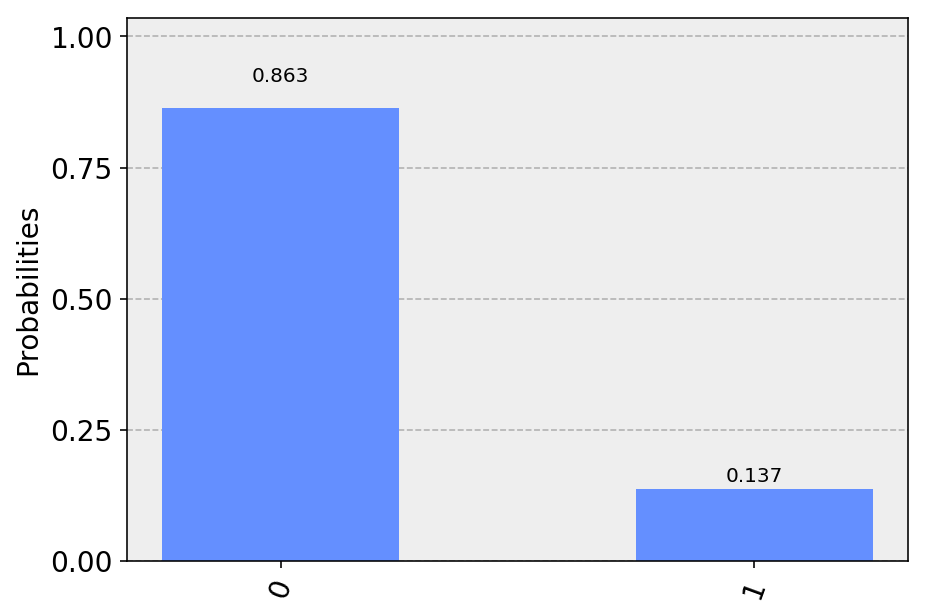

In [7]:
bob = {}
bob['0'] = data['0 0 0'] + data['0 1 0'] +  data['0 0 1'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 1 0'] +  data['1 0 1'] + data['1 1 1']
plot_histogram(bob)

<div class="alert alert-block alert-info">
    
$$\begin{split}R_y(\pi/4) |0\rangle =
\begin{pmatrix}
\cos(\pi/8) & - \sin(\pi/8)\\
\sin(\pi/8) & \cos(\pi/8).
\end{pmatrix} \end{split}\left( \begin{array}{c} 1\\ 0 \end{array} \right) =\left( \begin{array}{c} \cos(\pi/8)\\ \sin(\pi/8) \end{array} \right) = \cos(\pi/8)|0\rangle + \sin(\pi/8)|1\rangle$$

よって、

０が観測される確率は$|cos(\pi/8)|^2 \approx (0.92388)^2= 0.8536 $、

1が観測される確率は $| sin(\pi/8)|^2 \approx (0.38268)^2 = 0.1464 $となる
</div>

## 演習問題 <a id='a6'></a>

### 1. このプログラムで構成した回路が、先に見た回路と同じことを確かめよ。
### 2. 転送すべき量子状態を、$R_y(y=\pi/4)|0\rangle$から $H|0\rangle$に変えて実行して、何が起きるかを確認せよ。
### 3. AliceとBobが、$\Phi^+ =1/√2 (|00\rangle+|11\rangle) $ではなく、同じくエンタングルした状態 $\Psi^＋=1/√2 (|10\rangle+|01\rangle) $を共有しているとしよう。この時、量子テレポーテーションは可能かどうか考えよ。


　
### 　　　　　　　　[前の章へ](./6_entanglement.ipynb)　[全体目次](./Contents.ipynb)　 [次の章へ](./1_basic.ipynb)